In [312]:
import astropy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import statistics
import numpy

In [313]:
from astropy.io import fits

Il programma è diviso in 3 parti, ciascuna corrispondente ai 3 file di dati che vengo analizzati tutti allo stesso modo. 

# FIRST FILE

Lettura dei dati per ogni tipo di multipolo

In [314]:
nbin=200 
N_mis=10000
test=1
mis1=[]

for i in np.arange(N_mis)+1:
    
    filename= f'/Users/Tommaso/Downloads/dati/data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    file=fits.open(filename)
    table= file[1].data.copy()
    mis1.append(table['XI0'])
    
    if i==1:
        
        scale = table['SCALE']
        
    del table
    file.close()
    
mis1=np.asarray(mis1).transpose()

In [315]:
mis2=[]

for i in np.arange(N_mis)+1:
    
    filename2= f'/Users/Tommaso/Downloads/dati/data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    file2=fits.open(filename2)
    table2= file2[1].data.copy()
    mis2.append(table2['XI2'])
    
    if i==1:
        
        scale2 = table2['SCALE']
        
    del table2
    file.close()
    
mis2=np.asarray(mis2).transpose()

In [316]:
mis3=[]

for i in np.arange(N_mis)+1:
    
    filename3= f'/Users/Tommaso/Downloads/dati/data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    file3=fits.open(filename3)
    table3= file3[1].data.copy()
    mis3.append(table3['XI4'])
    
    if i==1:
        
        scale3 = table3['SCALE']
        
    del table3
    file.close()
    
mis3=np.asarray(mis3).transpose()

## THEORETICAL COVARIANCE

Calcolo della covarianza teorica attraverso la formula fornita per ogni singolo multipolo e diversi mutipoli.

In [318]:
Covth1v1=np.zeros((nbin,nbin), dtype=float)

sigma=[0.02,0,0.02,0,0.02]
h=[25,0,50,0,75]

l=0 

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth1v1[i,j]=0
            
        else:
            
            Covth1v1[i,j]= sigma[l]**2.*np.exp(-(scale[i]-scale[j])**2./(2.*h[l]**2.))

In [319]:
Covth2v1=np.zeros((nbin,nbin), dtype=float)

l=2 

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth2v1[i,j]=0
            
        else:
            
            Covth2v1[i,j]= sigma[l]**2.*np.exp(-(scale2[i]-scale2[j])**2./(2.*h[l]**2.))

In [320]:
Covth3v1=np.zeros((nbin,nbin), dtype=float)

l=4

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth3v1[i,j]=0
            
        else:
            
            Covth3v1[i,j]= sigma[l]**2.*np.exp(-(scale3[i]-scale3[j])**2./(2.*h[l]**2.))

In [321]:
Covth1_2=np.zeros((nbin,nbin), dtype=float)

l=0
lp=2   

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth1_2[i,j]=0
            
        else:
            
            Covth1_2[i,j]= sigma[l]*sigma[lp]*np.sqrt(2.*(h[l]*h[lp])/((h[l]**2.)+(h[lp]**2.))) *np.exp(-(scale[i]-scale[j])**2./((h[l]**2.)+(h[lp]**2.)))     

In [322]:
Covth2_3=np.zeros((nbin,nbin), dtype=float)

l=2
lp=4  

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth2_3[i,j]=0
            
        else:
            
             Covth2_3[i,j]= sigma[l]*sigma[lp]*np.sqrt(2.*(h[l]*h[lp])/((h[l]**2.)+(h[lp]**2.))) *np.exp(-(scale[i]-scale[j])**2./((h[l]**2.)+(h[lp]**2.)))     

In [323]:
Covth1_3=np.zeros((nbin,nbin), dtype=float)

l=0
lp=4  

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth1_3[i,j]=0
            
        else:
            
             Covth1_3[i,j]=sigma[l]*sigma[lp]*np.sqrt(2.*(h[l]*h[lp])/((h[l]**2.)+(h[lp]**2.))) *np.exp(-(scale[i]-scale[j])**2./((h[l]**2.)+(h[lp]**2.)))     

#### PLOT OF THEORETICAL COVARIANCE

In [324]:
crosscovmatrix=np.zeros((3*nbin,3*nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        for t1 in range(3):
            
            for t2 in range (3):
                
                I=i+t1*nbin
                J=j+t2*nbin
                
                if I<nbin and J<nbin:
                    
                    crosscovmatrix[I,J]=Covth1v1[i,j]
                    
                if I<2*nbin and I>nbin and J<2*nbin and J>nbin:
                    
                    crosscovmatrix[I,J]=Covth2v1[i,j]
                    
                if I>2*nbin and J>2*nbin:
                    
                    crosscovmatrix[I,J]=Covth3v1[i,j]
                    
                if (I<nbin and J<2*nbin and J>nbin) or (I<2*nbin and I>nbin and J<nbin):
                    
                    crosscovmatrix[I,J]=Covth1_2[i,j]
                    
                if (I<nbin and J>2*nbin) or (I>2*nbin and J<nbin):
                    
                    crosscovmatrix[I,J]=Covth1_3[i,j]
                    
                if (I<2*nbin and I>nbin and J>2*nbin) or (I>2*nbin and J<2*nbin and J>nbin):
                    
                    crosscovmatrix[I,J]=Covth2_3[i,j]

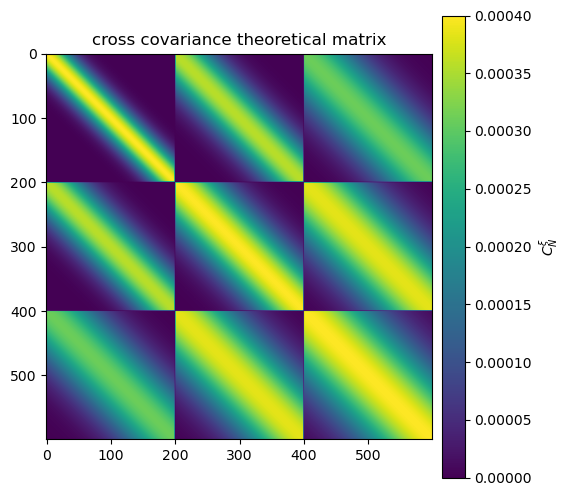

In [325]:
gratio = (1. + 5. ** 0.5) / 2.

dpi = 300

fig = plt.figure(figsize=(6,6))
plt.title('cross covariance theoretical matrix')
plt.imshow(crosscovmatrix)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')

plt.show()

## MEASURED COVARIANCE

In [326]:
ave1 = np.zeros((nbin),dtype=float)
ave2 = np.zeros((nbin),dtype=float)
ave3 = np.zeros((nbin),dtype=float)

cov1 = np.zeros((nbin,nbin),dtype=float)
cov2 = np.zeros((nbin,nbin),dtype=float)
cov3 = np.zeros((nbin,nbin),dtype=float)

cov1_2 = np.zeros((nbin,nbin),dtype=float)
cov1_3 = np.zeros((nbin,nbin),dtype=float)
cov2_3 = np.zeros((nbin,nbin),dtype=float)

ave1 = np.sum(mis1, axis=1)/N_mis
ave2 = np.sum(mis2, axis=1)/N_mis
ave3 = np.sum(mis3, axis=1)/N_mis

for i in range(nbin):
    
    for j in range(nbin):
        
        q1=(np.sum(mis1[i]*mis1[j]) - ave1[i]*ave1[j]*N_mis)
        cov1[i,j] = q1/(N_mis-1.)
        
        q2=(np.sum(mis2[i]*mis2[j]) - ave2[i]*ave2[j]*N_mis)
        cov2[i,j] = q2/(N_mis-1.)
        
        q3=(np.sum(mis3[i]*mis3[j]) - ave3[i]*ave3[j]*N_mis)
        cov3[i,j] = q3/(N_mis-1.)
        
        q12=(np.sum(mis1[i]*mis2[j]) - ave1[i]*ave2[j]*N_mis)
        cov1_2[i,j] = q12/(N_mis-1.)
        
        q13=(np.sum(mis1[i]*mis3[j]) - ave1[i]*ave3[j]*N_mis)
        cov1_3[i,j] = q13/(N_mis-1.)
        
        q23=(np.sum(mis2[i]*mis3[j]) - ave2[i]*ave3[j]*N_mis)
        cov2_3[i,j] = q23/(N_mis-1.)

Running test to see the covariance:


#### PLOT OF MEASURED COVARIANCE 

In [328]:
crosscovmatrix_mis=np.zeros((3*nbin,3*nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        for t1 in range(3):
            
            for t2 in range (3):
                
                I=i+t1*nbin
                J=j+t2*nbin
                
                if I<nbin and J<nbin:
                    
                    crosscovmatrix_mis[I,J]=cov1[i,j]
                    
                if I<2*nbin and I>nbin and J<2*nbin and J>nbin:
                    
                    crosscovmatrix_mis[I,J]=cov2[i,j]
                    
                if I>2*nbin and J>2*nbin:
                    
                    crosscovmatrix_mis[I,J]=cov3[i,j]
                    
                if (I<nbin and J<2*nbin and J>nbin) or (I<2*nbin and I>nbin and J<nbin):
                    
                    crosscovmatrix_mis[I,J]=cov1_2[i,j]
                    
                if (I<nbin and J>2*nbin) or (I>2*nbin and J<nbin):
                    
                    crosscovmatrix_mis[I,J]=cov1_3[i,j]
               
                if (I<2*nbin and I>nbin and J>2*nbin) or (I>2*nbin and J<2*nbin and J>nbin):
                    
                    crosscovmatrix_mis[I,J]=cov2_3[i,j]

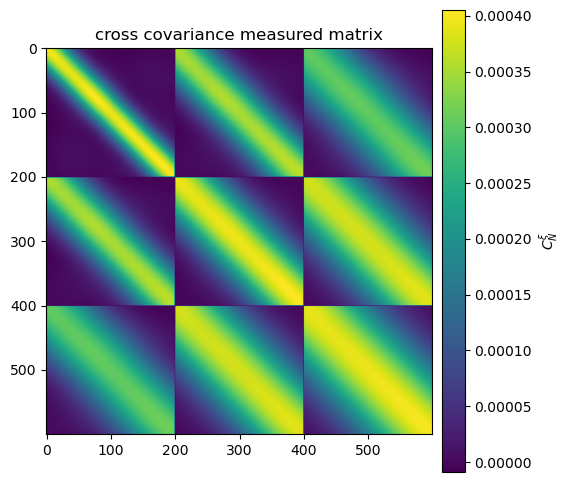

In [329]:
fig = plt.figure(figsize=(6,6))
plt.title('cross covariance measured matrix')
plt.imshow(crosscovmatrix_mis)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')

plt.show()

## RESIDUE

Calcolo della matrice di correlazione e di conseguenza il residuo per ogni singolo multipolo e diversi multipoli 

In [330]:
R1=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
        
        R1[i,j]=Covth1v1[i,j]**2./math.sqrt(Covth1v1[i,i]*Covth1v1[j,j]**2.)

In [331]:
Res1=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        Res1[i,j]=(Covth1v1[i,j]-cov1[i,j])*np.sqrt((N_mis - 1.)/((1.+R1[i,j])*Covth1v1[i,i]*Covth1v1[j,j]))        

In [332]:
R2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
    
        R2[i,j]=Covth2v1[i,j]**2./math.sqrt(Covth2v1[i,i]*Covth2v1[j,j]**2.)

In [333]:
Res2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
        
        Res2[i,j]=(Covth2v1[i,j]-cov2[i,j])*np.sqrt((N_mis - 1.)/((1.+R2[i,j])*Covth2v1[i,i]*Covth2v1[j,j]))        

In [334]:
R3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
    
        R3[i,j]=Covth3v1[i,j]**2./math.sqrt(Covth3v1[i,i]*Covth3v1[j,j]**2.)

In [335]:
Res3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
    
        Res3[i,j]=(Covth3v1[i,j]-cov3[i,j])*np.sqrt((N_mis - 1.)/((1.+R3[i,j])*Covth3v1[i,i]*Covth3v1[j,j]))        

In [336]:
R1_2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
    
        R1_2[i,j]=Covth1_2[i,j]**2./math.sqrt(Covth1_2[i,i]*Covth1_2[j,j]**2.)

In [337]:
Res1_2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        Res1_2[i,j]=(Covth1_2[i,j]-cov1_2[i,j])*np.sqrt((N_mis - 1.)/((1.+R1_2[i,j])*Covth1_2[i,i]*Covth1_2[j,j]))

In [338]:
R1_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        R1_3[i,j]=Covth1_3[i,j]**2./math.sqrt(Covth1_3[i,i]*Covth1_3[j,j]**2.)

In [339]:
Res1_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        Res1_3[i,j]=(Covth1_3[i,j]-cov1_3[i,j])*np.sqrt((N_mis - 1)/((1+R1_3[i,j])*Covth1_3[i,i]*Covth1_3[j,j]))

In [340]:
R2_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        R2_3[i,j]=Covth2_3[i,j]**2./np.sqrt(Covth2_3[i,i]*Covth2_3[j,j]**2.)

In [341]:
Res2_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
        
        Res2_3[i,j]=(Covth2_3[i,j]-cov2_3[i,j])*np.sqrt((N_mis - 1.)/((1.+R2_3[i,j])*Covth2_3[i,i]*Covth2_3[j,j]))

In [342]:
crossresiduesmatrix=np.zeros((3*nbin,3*nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
    
        for t1 in range(3):
        
            for t2 in range (3):
            
                I=i+t1*nbin
                J=j+t2*nbin
                
                if I<nbin and J<nbin:
                    
                    crossresiduesmatrix[I,J]=Res1[i,j]
                    
                if I<2*nbin and I>nbin and J<2*nbin and J>nbin:
                    
                    crossresiduesmatrix[I,J]=Res2[i,j]
                    
                if I>2*nbin and J>2*nbin:
                    
                    crossresiduesmatrix[I,J]=Res3[i,j]
                    
                if (I<nbin and J<2*nbin and J>nbin) or (I<2*nbin and I>nbin and J<nbin):
                    
                    crossresiduesmatrix[I,J]=Res1_2[i,j]
                    
                if (I<nbin and J>2*nbin) or (I>2*nbin and J<nbin):
                    
                    crossresiduesmatrix[I,J]=Res1_3[i,j]
                    
                if (I<2*nbin and I>nbin and J>2*nbin) or (I>2*nbin and J<2*nbin and J>nbin):
                    crossresiduesmatrix[I,J]=Res2_3[i,j]

#### PLOT OF RESIDUE

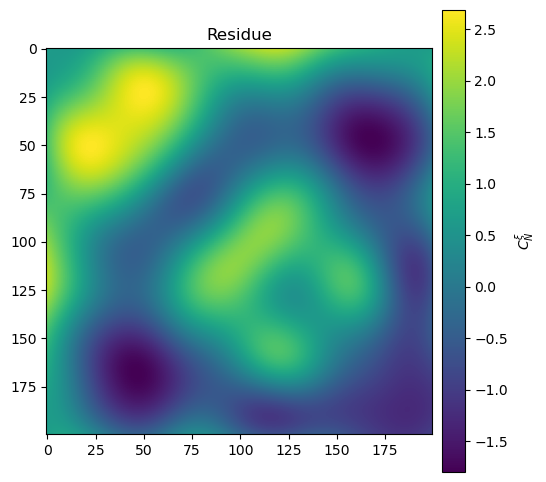

In [343]:
fig = plt.figure(figsize=(6,6))
plt.title('Residue')
plt.imshow(Res1)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

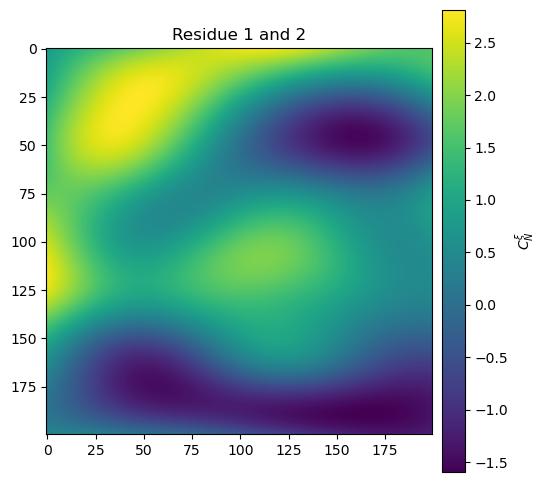

In [344]:
fig = plt.figure(figsize=(6,6))
plt.title('Residue 1 and 2')

plt.imshow(Res1_2)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

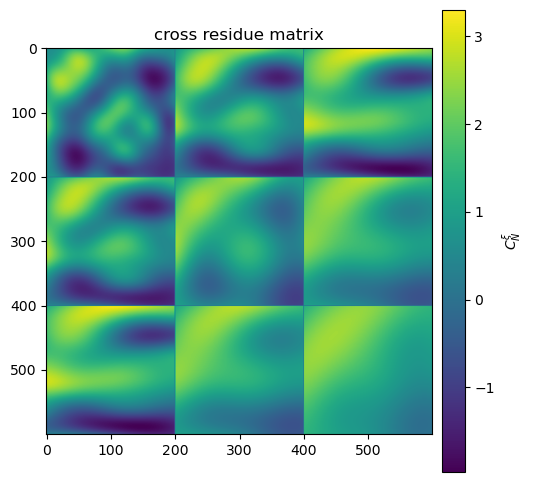

1.098754833492832


In [345]:
fig = plt.figure(figsize=(6,6))
cmin = -np.max(Res1)*0.05
cmax =  np.max(Res1)*1.05
plt.title('cross residue matrix')
plt.imshow(crossresiduesmatrix)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')

plt.show()
print(np.std(crossresiduesmatrix))

# SECOND FILE 

In [346]:
test=2
mis1=[]

for i in np.arange(N_mis)+1:
    
    filename= f'/Users/Tommaso/Downloads/dati/data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    file=fits.open(filename)
    table= file[1].data.copy()
    mis1.append(table['XI0'])
    
    if i==1:
        
        scale = table['SCALE']
        
    del table
    file.close()
    
mis1=np.asarray(mis1).transpose()

In [347]:
mis2=[]

for i in np.arange(N_mis)+1:
    
    filename2= f'/Users/Tommaso/Downloads/dati/data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    file2=fits.open(filename2)
    table2= file2[1].data.copy()
    mis2.append(table2['XI2'])
    
    if i==1:
        
        scale2 = table2['SCALE']
        
    del table2
    file.close()
    
mis2=np.asarray(mis2).transpose()

In [348]:
mis3=[]

for i in np.arange(N_mis)+1:
    
    filename3= f'/Users/Tommaso/Downloads/dati/data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    file3=fits.open(filename3)
    table3= file3[1].data.copy()
    mis3.append(table3['XI4'])
    
    if i==1:
        
        scale3 = table3['SCALE']
        
    del table3
    file.close()
    
mis3=np.asarray(mis3).transpose()

## THEORETICAL COVARIANCE

In [350]:
Covth1v1=np.zeros((nbin,nbin), dtype=float)

sigma=[0.02,0,0.01,0,0.005]
h=[50,0,50,0,50]
l=0 

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth1v1[i,j]=0
            
        else:
            
            Covth1v1[i,j]= sigma[l]**2.*np.exp(-(scale[i]-scale[j])**2./(2.*h[l]**2.))

In [351]:
Covth2v1=np.zeros((nbin,nbin), dtype=float)

l=2   

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth2v1[i,j]=0
            
        else:
            
            Covth2v1[i,j]= sigma[l]**2.*np.exp(-(scale2[i]-scale2[j])**2./(2.*h[l]**2.))

In [352]:
Covth3v1=np.zeros((nbin,nbin), dtype=float)

l=4   

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth3v1[i,j]=0
            
        else:
            
            Covth3v1[i,j]= sigma[l]**2.*np.exp(-(scale3[i]-scale3[j])**2./(2.*h[l]**2.))

In [353]:
Covth1_2=np.zeros((nbin,nbin), dtype=float)

l=0
lp=2   

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth1_2[i,j]=0
            
        else:
            
            Covth1_2[i,j]= sigma[l]*sigma[lp]*np.sqrt(2.*(h[l]*h[lp])/((h[l]**2.)+(h[lp]**2.))) *np.exp(-(scale[i]-scale[j])**2./((h[l]**2.)+(h[lp]**2.)))     

In [354]:
Covth2_3=np.zeros((nbin,nbin), dtype=float)

l=2
lp=4   

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth2_3[i,j]=0
            
        else:
            
             Covth2_3[i,j]= sigma[l]*sigma[lp]*np.sqrt(2.*(h[l]*h[lp])/((h[l]**2.)+(h[lp]**2.))) *np.exp(-(scale[i]-scale[j])**2./((h[l]**2.)+(h[lp]**2.)))     

In [355]:
Covth1_3=np.zeros((nbin,nbin), dtype=float)

l=0
lp=4  

for i in range(nbin):
    
    for j in range(nbin):
        
        if sigma[l]==0:
            
            Covth1_3[i,j]=0
            
        else:
            
             Covth1_3[i,j]=sigma[l]*sigma[lp]*np.sqrt(2.*(h[l]*h[lp])/((h[l]**2.)+(h[lp]**2.))) *np.exp(-(scale[i]-scale[j])**2./((h[l]**2.)+(h[lp]**2.)))     

#### PLOT OF THEORETICAL COVARIANCE

In [356]:
crosscovmatrix=np.zeros((3*nbin,3*nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        for t1 in range(3):
            
            for t2 in range (3):
                
                I=i+t1*nbin
                J=j+t2*nbin
                
                if I<nbin and J<nbin:
                    
                    crosscovmatrix[I,J]=Covth1v1[i,j]
                    
                if I<2*nbin and I>nbin and J<2*nbin and J>nbin:
                    
                    crosscovmatrix[I,J]=Covth2v1[i,j]
                    
                if I>2*nbin and J>2*nbin:
                    
                    crosscovmatrix[I,J]=Covth3v1[i,j]
                    
                if (I<nbin and J<2*nbin and J>nbin) or (I<2*nbin and I>nbin and J<nbin):
                    
                    crosscovmatrix[I,J]=Covth1_2[i,j]
                    
                if (I<nbin and J>2*nbin) or (I>2*nbin and J<nbin):
                    
                    crosscovmatrix[I,J]=Covth1_3[i,j]
                    
                if (I<2*nbin and I>nbin and J>2*nbin) or (I>2*nbin and J<2*nbin and J>nbin):
                    
                    crosscovmatrix[I,J]=Covth2_3[i,j]

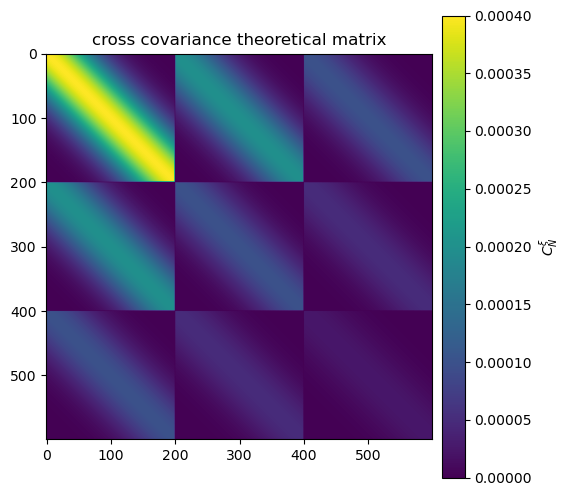

In [357]:
fig = plt.figure(figsize=(6,6))
plt.title('cross covariance theoretical matrix')
plt.imshow(crosscovmatrix)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')

plt.show()

## MEASURED COVARIANCE

In [358]:
ave1 = np.zeros((nbin),dtype=float)
ave2 = np.zeros((nbin),dtype=float)
ave3 = np.zeros((nbin),dtype=float)

cov1 = np.zeros((nbin,nbin),dtype=float)
cov2 = np.zeros((nbin,nbin),dtype=float)
cov3 = np.zeros((nbin,nbin),dtype=float)

cov1_2 = np.zeros((nbin,nbin),dtype=float)
cov1_3 = np.zeros((nbin,nbin),dtype=float)
cov2_3 = np.zeros((nbin,nbin),dtype=float)

ave1 = np.sum(mis1, axis=1)/N_mis
ave2 = np.sum(mis2, axis=1)/N_mis
ave3 = np.sum(mis3, axis=1)/N_mis

for i in range(nbin):
    
    for j in range(nbin):
        
        q1=(np.sum(mis1[i]*mis1[j]) - ave1[i]*ave1[j]*N_mis)
        cov1[i,j] = q1/(N_mis-1.)
        
        q2=(np.sum(mis2[i]*mis2[j]) - ave2[i]*ave2[j]*N_mis)
        cov2[i,j] = q2/(N_mis-1.)
        
        q3=(np.sum(mis3[i]*mis3[j]) - ave3[i]*ave3[j]*N_mis)
        cov3[i,j] = q3/(N_mis-1.)
        
        q12=(np.sum(mis1[i]*mis2[j]) - ave1[i]*ave2[j]*N_mis)
        cov1_2[i,j] = q12/(N_mis-1.)
        
        q13=(np.sum(mis1[i]*mis3[j]) - ave1[i]*ave3[j]*N_mis)
        cov1_3[i,j] = q13/(N_mis-1.)
        
        q23=(np.sum(mis2[i]*mis3[j]) - ave2[i]*ave3[j]*N_mis)
        cov2_3[i,j] = q23/(N_mis-1.)

Running test to see the covariance:


In [360]:
crosscovmatrix_mis=np.zeros((3*nbin,3*nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        for t1 in range(3):
            
            for t2 in range (3):
                
                I=i+t1*nbin
                J=j+t2*nbin
                
                if I<nbin and J<nbin:
                    
                    crosscovmatrix_mis[I,J]=cov1[i,j]
                    
                if I<2*nbin and I>nbin and J<2*nbin and J>nbin:
                    
                    crosscovmatrix_mis[I,J]=cov2[i,j]
                    
                if I>2*nbin and J>2*nbin:
                    
                    crosscovmatrix_mis[I,J]=cov3[i,j]
                    
                if (I<nbin and J<2*nbin and J>nbin) or (I<2*nbin and I>nbin and J<nbin):
                    
                    crosscovmatrix_mis[I,J]=cov1_2[i,j]
                    
                if (I<nbin and J>2*nbin) or (I>2*nbin and J<nbin):
                    
                    crosscovmatrix_mis[I,J]=cov1_3[i,j]
               
                if (I<2*nbin and I>nbin and J>2*nbin) or (I>2*nbin and J<2*nbin and J>nbin):
                    
                    crosscovmatrix_mis[I,J]=cov2_3[i,j]

#### PLOT OF MEASURED COVARIANCE

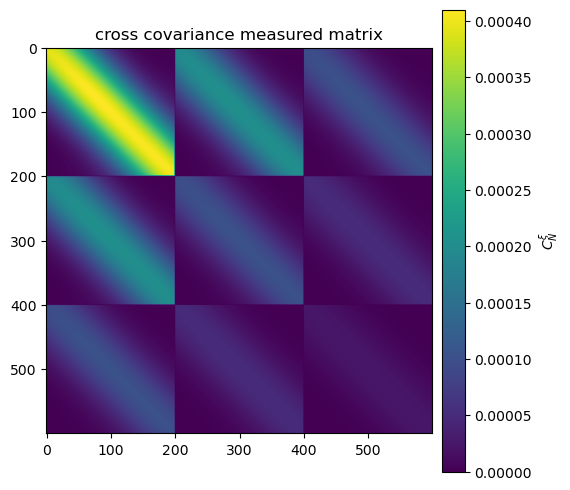

In [361]:
fig = plt.figure(figsize=(6,6))
plt.title('cross covariance measured matrix')
plt.imshow(crosscovmatrix_mis)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')

plt.show()

## RESIDUE

In [362]:
R1=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
        
        R1[i,j]=Covth1v1[i,j]**2./math.sqrt(Covth1v1[i,i]*Covth1v1[j,j]**2.)

In [363]:
Res1=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        Res1[i,j]=(Covth1v1[i,j]-cov1[i,j])*np.sqrt((N_mis - 1.)/((1.+R1[i,j])*Covth1v1[i,i]*Covth1v1[j,j]))        

In [364]:
R2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
    
        R2[i,j]=Covth2v1[i,j]**2./math.sqrt(Covth2v1[i,i]*Covth2v1[j,j]**2.)

In [365]:
Res2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
        
        Res2[i,j]=(Covth2v1[i,j]-cov2[i,j])*np.sqrt((N_mis - 1.)/((1.+R2[i,j])*Covth2v1[i,i]*Covth2v1[j,j]))       

In [366]:
R3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
    
        R3[i,j]=Covth3v1[i,j]**2./math.sqrt(Covth3v1[i,i]*Covth3v1[j,j]**2.)

In [367]:
Res3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
    
        Res3[i,j]=(Covth3v1[i,j]-cov3[i,j])*np.sqrt((N_mis - 1.)/((1.+R3[i,j])*Covth3v1[i,i]*Covth3v1[j,j])) 

In [368]:
R1_2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
    
        R1_2[i,j]=Covth1_2[i,j]**2./math.sqrt(Covth1_2[i,i]*Covth1_2[j,j]**2.)

In [369]:
Res1_2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        Res1_2[i,j]=(Covth1_2[i,j]-cov1_2[i,j])*np.sqrt((N_mis - 1.)/((1.+R1_2[i,j])*Covth1_2[i,i]*Covth1_2[j,j]))

In [370]:
R1_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        R1_3[i,j]=Covth1_3[i,j]**2./math.sqrt(Covth1_3[i,i]*Covth1_3[j,j]**2.)

In [371]:
Res1_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        Res1_3[i,j]=(Covth1_3[i,j]-cov1_3[i,j])*np.sqrt((N_mis - 1)/((1+R1_3[i,j])*Covth1_3[i,i]*Covth1_3[j,j]))

In [372]:
R2_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        R2_3[i,j]=Covth2_3[i,j]**2./np.sqrt(Covth2_3[i,i]*Covth2_3[j,j]**2.)

In [373]:
Res2_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
        
        Res2_3[i,j]=(Covth2_3[i,j]-cov2_3[i,j])*np.sqrt((N_mis - 1.)/((1.+R2_3[i,j])*Covth2_3[i,i]*Covth2_3[j,j]))

In [374]:
crossresiduesmatrix=np.zeros((3*nbin,3*nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
    
        for t1 in range(3):
        
            for t2 in range (3):
            
                I=i+t1*nbin
                J=j+t2*nbin
                
                if I<nbin and J<nbin:
                    
                    crossresiduesmatrix[I,J]=Res1[i,j]
                    
                if I<2*nbin and I>nbin and J<2*nbin and J>nbin:
                    
                    crossresiduesmatrix[I,J]=Res2[i,j]
                    
                if I>2*nbin and J>2*nbin:
                    
                    crossresiduesmatrix[I,J]=Res3[i,j]
                    
                if (I<nbin and J<2*nbin and J>nbin) or (I<2*nbin and I>nbin and J<nbin):
                    
                    crossresiduesmatrix[I,J]=Res1_2[i,j]
                    
                if (I<nbin and J>2*nbin) or (I>2*nbin and J<nbin):
                    
                    crossresiduesmatrix[I,J]=Res1_3[i,j]
                    
                if (I<2*nbin and I>nbin and J>2*nbin) or (I>2*nbin and J<2*nbin and J>nbin):
                    crossresiduesmatrix[I,J]=Res2_3[i,j]

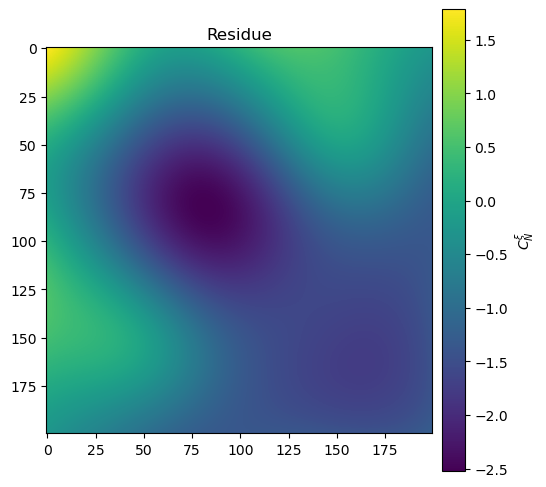

In [375]:
fig = plt.figure(figsize=(6,6))
plt.title('Residue')
plt.imshow(Res1)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

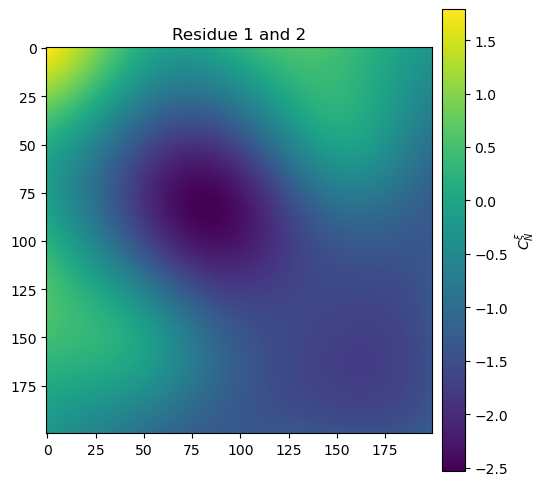

In [376]:
fig = plt.figure(figsize=(6,6))
plt.title('Residue 1 and 2')

plt.imshow(Res1_2)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

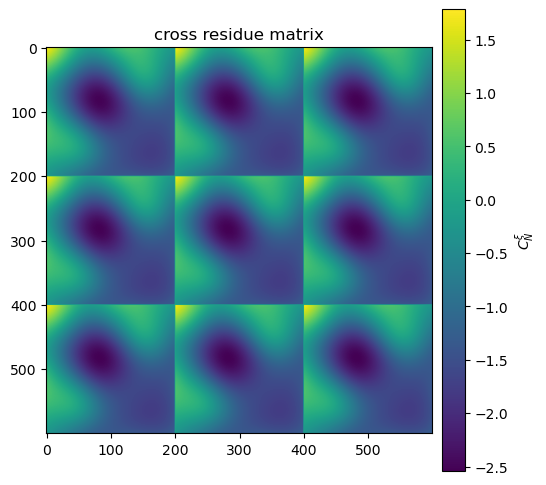

0.8151732696103274


In [377]:
fig = plt.figure(figsize=(6,6))
cmin = -np.max(Res1)*0.05
cmax =  np.max(Res1)*1.05
plt.title('cross residue matrix')
plt.imshow(crossresiduesmatrix)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')

plt.show()
print(np.std(crossresiduesmatrix))

# THIRD FILE

In [378]:
test=3
mis1=[]

for i in np.arange(N_mis)+1:
    
    filename= f'/Users/Tommaso/Downloads/dati/data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    file=fits.open(filename)
    table= file[1].data.copy()
    mis1.append(table['XI0'])

    if i==1:

        scale = table['SCALE']
    
    del table
    file.close()
    
mis1=np.asarray(mis1).transpose()

In [379]:
mis2=[]

for i in np.arange(N_mis)+1:

    filename2= f'/Users/Tommaso/Downloads/dati/data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    file2=fits.open(filename2)
    table2= file2[1].data.copy()
    mis2.append(table2['XI2'])

    if i==1:
    
        scale2 = table2['SCALE']
    
    del table2
    file.close()
    
mis2=np.asarray(mis2).transpose()

In [380]:
mis3=[]

for i in np.arange(N_mis)+1:
    filename3= f'/Users/Tommaso/Downloads/dati/data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    file3=fits.open(filename3)
    table3= file3[1].data.copy()
    mis3.append(table3['XI4'])

    if i==1:
    
        scale3 = table3['SCALE']
    
    del table3
    file.close()
    
mis3=np.asarray(mis3).transpose()

## THEORETICAL COVARIANCE

In [382]:
Covth1v1=np.zeros((nbin,nbin), dtype=float)

sigma=[0.02,0,0.01,0,0.005]
h=[5,0,5,0,5]
l=0 

for i in range(nbin):

    for j in range(nbin):
    
        if sigma[l]==0:
        
            Covth1v1[i,j]=0
        
        else:
        
            Covth1v1[i,j]= sigma[l]**2.*np.exp(-(scale[i]-scale[j])**2./(2.*h[l]**2.))

In [383]:
Covth2v1=np.zeros((nbin,nbin), dtype=float)

l=2  

for i in range(nbin):

    for j in range(nbin):
    
        if sigma[l]==0:
        
            Covth2v1[i,j]=0
        
        else:
        
            Covth2v1[i,j]= sigma[l]**2.*np.exp(-(scale[i]-scale[j])**2./(2.*h[l]**2.))

In [384]:
Covth3v1=np.zeros((nbin,nbin), dtype=float)

l=4   

for i in range(nbin):

    for j in range(nbin):
    
        if sigma[l]==0:
        
            Covth3v1[i,j]=0
        
        else:
        
            Covth3v1[i,j]= sigma[l]**2.*np.exp(-(scale[i]-scale[j])**2./(2.*h[l]**2.))

In [386]:
Covth1_2=np.zeros((nbin,nbin), dtype=float)

l=0
lp=2  

for i in range(nbin):

    for j in range(nbin):
    
        if sigma[l]==0:
    
            Covth1_2[i,j]=0
        
        else:
        
            Covth1_2[i,j]= sigma[l]*sigma[lp]*np.sqrt(2.*(h[l]*h[lp])/((h[l]**2.)+(h[lp]**2.))) *np.exp(-(scale[i]-scale[j])**2./((h[l]**2.)+(h[lp]**2.)))     

In [387]:
Covth2_3=np.zeros((nbin,nbin), dtype=float)

l=2
lp=4   

for i in range(nbin):

    for j in range(nbin):
    
        if sigma[l]==0:
        
            Covth2_3[i,j]=0
        
        else:
        
            Covth2_3[i,j]= sigma[l]*sigma[lp]*np.sqrt(2.*(h[l]*h[lp])/((h[l]**2.)+(h[lp]**2.))) *np.exp(-(scale[i]-scale[j])**2./((h[l]**2.)+(h[lp]**2.))) 

In [388]:
Covth1_3=np.zeros((nbin,nbin), dtype=float)

l=0
lp=4  

for i in range(nbin):

    for j in range(nbin):
    
        if sigma[l]==0:
        
            Covth1_3[i,j]=0
        
        else:
        
            Covth1_3[i,j]=sigma[l]*sigma[lp]*np.sqrt(2.*(h[l]*h[lp])/((h[l]**2.)+(h[lp]**2.))) *np.exp(-(scale[i]-scale[j])**2./((h[l]**2.)+(h[lp]**2.))) 

#### PLOT OF THEORETICAL COVARIANCE

In [389]:
crosscovmatrix=np.zeros((3*nbin,3*nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        for t1 in range(3):
            
            for t2 in range (3):
                
                I=i+t1*nbin
                J=j+t2*nbin
                
                if I<nbins and J<nbins:
                    
                    crosscovmatrix[I,J]=Covth1v1[i,j]
                    
                if I<2*nbin and I>nbin and J<2*nbin and J>nbin:
                    
                    crosscovmatrix[I,J]=Covth2v1[i,j]
                    
                if I>2*nbin and J>2*nbin:
                    
                    crosscovmatrix[I,J]=Covth3v1[i,j]
                    
                if (I<nbin and J<2*nbin and J>nbin) or (I<2*nbin and I>nbin and J<nbin):
                    
                    crosscovmatrix[I,J]=Covth1_2[i,j]
                    
                if (I<nbin and J>2*nbin) or (I>2*nbin and J<nbin):
                    
                    crosscovmatrix[I,J]=Covth1_3[i,j]
                    
                if (I<2*nbin and I>nbin and J>2*nbin) or (I>2*nbin and J<2*nbin and J>nbin):
                    
                    crosscovmatrix[I,J]=Covth2_3[i,j]

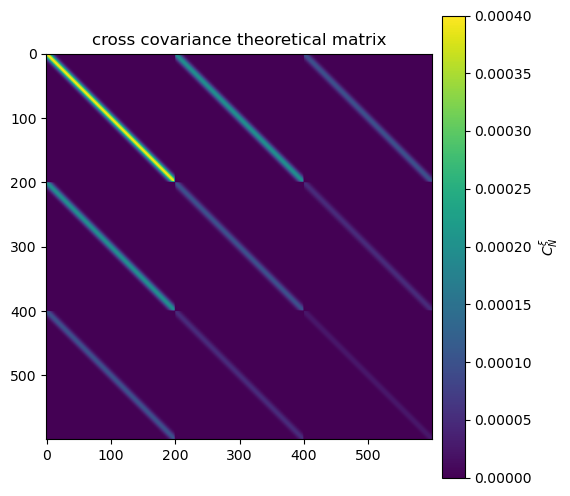

In [390]:
fig = plt.figure(figsize=(6,6))
plt.title('cross covariance theoretical matrix')
plt.imshow(crosscovmatrix)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')

plt.show()

## MEASURED COVARIANCE

In [391]:
ave1 = np.zeros((nbin),dtype=float)
ave2 = np.zeros((nbin),dtype=float)
ave3 = np.zeros((nbin),dtype=float)

cov1 = np.zeros((nbin,nbin),dtype=float)
cov2 = np.zeros((nbin,nbin),dtype=float)
cov3 = np.zeros((nbin,nbin),dtype=float)

cov1_2 = np.zeros((nbin,nbin),dtype=float)
cov1_3 = np.zeros((nbin,nbin),dtype=float)
cov2_3 = np.zeros((nbin,nbin),dtype=float)

ave1 = np.sum(mis1, axis=1)/N_mis
ave2 = np.sum(mis2, axis=1)/N_mis
ave3 = np.sum(mis3, axis=1)/N_mis

for i in range(nbin):
    
    for j in range(nbin):
        
        q1=(np.sum(mis1[i]*mis1[j]) - ave1[i]*ave1[j]*N_mis)
        cov1[i,j] = q1/(N_mis-1.)

        q2=(np.sum(mis2[i]*mis2[j]) - ave2[i]*ave2[j]*N_mis)
        cov2[i,j] = q2/(N_mis-1.)
        
        q3=(np.sum(mis3[i]*mis3[j]) - ave3[i]*ave3[j]*N_mis)
        cov3[i,j] = q3/(N_mis-1.)
        
        q12=(np.sum(mis1[i]*mis2[j]) - ave1[i]*ave2[j]*N_mis)
        cov1_2[i,j] = q12/(N_mis-1.)
        
        q13=(np.sum(mis1[i]*mis3[j]) - ave1[i]*ave3[j]*N_mis)
        cov1_3[i,j] = q13/(N_mis-1.)
        
        q23=(np.sum(mis2[i]*mis3[j]) - ave2[i]*ave3[j]*N_mis)
        cov2_3[i,j] = q23/(N_mis-1.)

Running test to see the covariance:


#### PLOT OF MEASURED COVARIANCE

In [393]:
crosscovmatrix_mis=np.zeros((3*nbin,3*nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        for t1 in range(3):
            
            for t2 in range (3):
                
                I=i+t1*nbin
                J=j+t2*nbin
                
                if I<nbin and J<nbin:
                    
                    crosscovmatrix_mis[I,J]=cov1[i,j]
                    
                if I<2*nbin and I>nbin and J<2*nbin and J>nbin:
                    
                    crosscovmatrix_mis[I,J]=cov2[i,j]
                    
                if I>2*nbin and J>2*nbin:
                    
                    crosscovmatrix_mis[I,J]=cov3[i,j]
                    
                if (I<nbin and J<2*nbin and J>nbin) or (I<2*nbin and I>nbin and J<nbin):
                    
                    crosscovmatrix_mis[I,J]=cov1_2[i,j]
                    
                if (I<nbin and J>2*nbin) or (I>2*nbin and J<nbin):
                    
                    crosscovmatrix_mis[I,J]=cov1_3[i,j]
               
                if (I<2*nbin and I>nbin and J>2*nbin) or (I>2*nbin and J<2*nbin and J>nbin):
                    
                    crosscovmatrix_mis[I,J]=cov2_3[i,j]

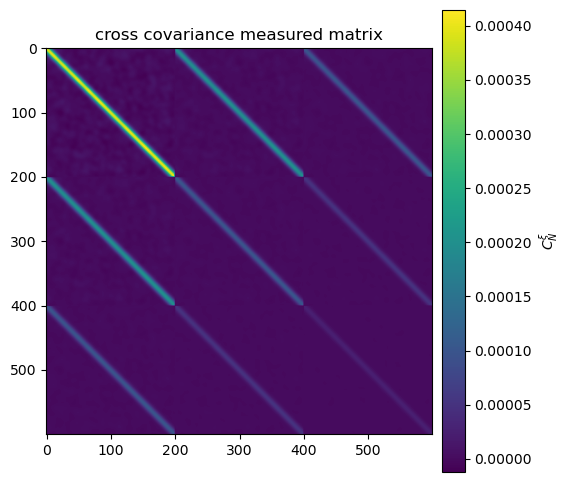

In [394]:
fig = plt.figure(figsize=(6,6))
plt.title('cross covariance measured matrix')
plt.imshow(crosscovmatrix_mis)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')

plt.show()

## RESIDUE

In [395]:
R1=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
        
        R1[i,j]=Covth1v1[i,j]**2./math.sqrt(Covth1v1[i,i]*Covth1v1[j,j]**2.)

In [396]:
Res1=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        Res1[i,j]=(Covth1v1[i,j]-cov1[i,j])*np.sqrt((N_mis - 1.)/((1.+R1[i,j])*Covth1v1[i,i]*Covth1v1[j,j]))        

In [397]:
R2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
    
        R2[i,j]=Covth2v1[i,j]**2./math.sqrt(Covth2v1[i,i]*Covth2v1[j,j]**2.)

In [398]:
Res2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
        
        Res2[i,j]=(Covth2v1[i,j]-cov2[i,j])*np.sqrt((N_mis - 1.)/((1.+R2[i,j])*Covth2v1[i,i]*Covth2v1[j,j]))

In [399]:
R3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
    
        R3[i,j]=Covth3v1[i,j]**2./math.sqrt(Covth3v1[i,i]*Covth3v1[j,j]**2.)

In [400]:
Res3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
    
        Res3[i,j]=(Covth3v1[i,j]-cov3[i,j])*np.sqrt((N_mis - 1.)/((1.+R3[i,j])*Covth3v1[i,i]*Covth3v1[j,j])) 

In [401]:
R1_2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
    
        R1_2[i,j]=Covth1_2[i,j]**2./math.sqrt(Covth1_2[i,i]*Covth1_2[j,j]**2.)

In [402]:
Res1_2=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        Res1_2[i,j]=(Covth1_2[i,j]-cov1_2[i,j])*np.sqrt((N_mis - 1.)/((1.+R1_2[i,j])*Covth1_2[i,i]*Covth1_2[j,j]))

In [403]:
R1_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        R1_3[i,j]=Covth1_3[i,j]**2./math.sqrt(Covth1_3[i,i]*Covth1_3[j,j]**2.)

In [404]:
Res1_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        Res1_3[i,j]=(Covth1_3[i,j]-cov1_3[i,j])*np.sqrt((N_mis - 1)/((1+R1_3[i,j])*Covth1_3[i,i]*Covth1_3[j,j]))

In [405]:
R2_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
        
        R2_3[i,j]=Covth2_3[i,j]**2./np.sqrt(Covth2_3[i,i]*Covth2_3[j,j]**2.)

In [406]:
Res2_3=np.zeros((nbin,nbin), dtype=float)

for i in range(nbin):

    for j in range(nbin):
        
        Res2_3[i,j]=(Covth2_3[i,j]-cov2_3[i,j])*np.sqrt((N_mis - 1.)/((1.+R2_3[i,j])*Covth2_3[i,i]*Covth2_3[j,j]))

In [407]:
crossresiduesmatrix=np.zeros((3*nbin,3*nbin), dtype=float)

for i in range(nbin):
    
    for j in range(nbin):
    
        for t1 in range(3):
        
            for t2 in range (3):
            
                I=i+t1*nbin
                J=j+t2*nbin
                
                if I<nbin and J<nbin:
                    
                    crossresiduesmatrix[I,J]=Res1[i,j]
                    
                if I<2*nbin and I>nbin and J<2*nbin and J>nbin:
                    
                    crossresiduesmatrix[I,J]=Res2[i,j]
                    
                if I>2*nbin and J>2*nbin:
                    
                    crossresiduesmatrix[I,J]=Res3[i,j]
                    
                if (I<nbin and J<2*nbin and J>nbin) or (I<2*nbin and I>nbin and J<nbin):
                    
                    crossresiduesmatrix[I,J]=Res1_2[i,j]
                    
                if (I<nbin and J>2*nbin) or (I>2*nbin and J<nbin):
                    
                    crossresiduesmatrix[I,J]=Res1_3[i,j]
                    
                if (I<2*nbin and I>nbin and J>2*nbin) or (I>2*nbin and J<2*nbin and J>nbin):
                    crossresiduesmatrix[I,J]=Res2_3[i,j]

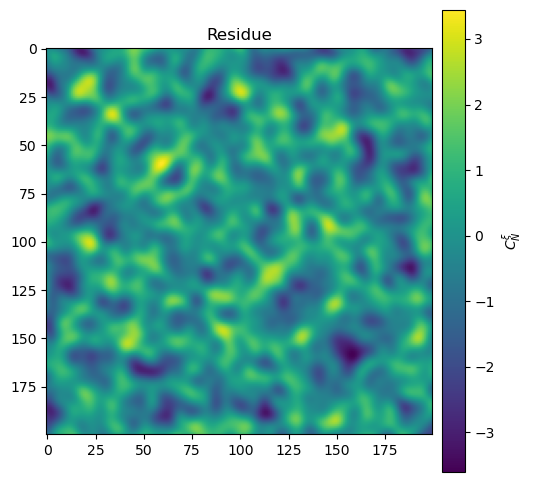

In [408]:
fig = plt.figure(figsize=(6,6))
plt.title('Residue')
plt.imshow(Res1)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

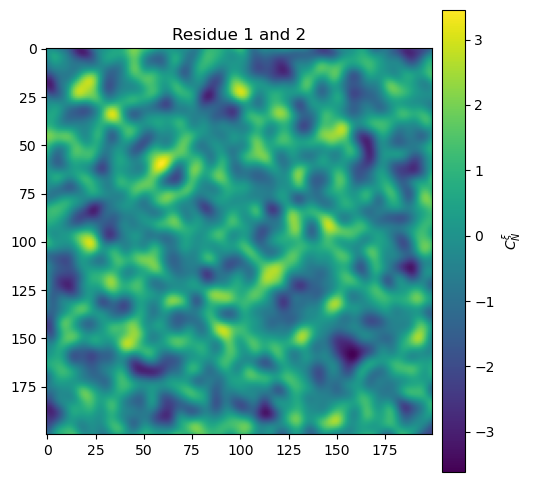

In [409]:
fig = plt.figure(figsize=(6,6))
plt.title('Residue 1 and 2')

plt.imshow(Res1_2)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

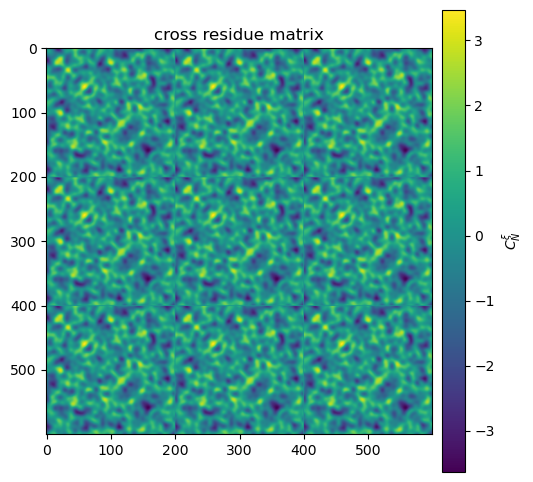

1.01602132626332


In [410]:
fig = plt.figure(figsize=(6,6))
cmin = -np.max(Res1)*0.05
cmax =  np.max(Res1)*1.05
plt.title('cross residue matrix')
plt.imshow(crossresiduesmatrix)
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(r'$ C^{\xi}_{N}$')

plt.show()
print(np.std(crossresiduesmatrix))